<h1>Cool Maths</h1>

<h2>Local Expensive Min</h2>

In [108]:
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pprint
import asyncio
import scipy
import math

from scipy import optimize as opt

def f(x):
    return x**2

async def slow(x):
    await asyncio.sleep(1)
    return f(x)

limits = np.array([-10, 10])



Guess = [0.]
Real = [0.]


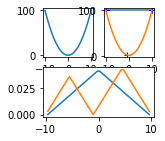

In [121]:
x = np.linspace(*limits, 50)
graphic = plt.figure(figsize = (2, 2))
gs = gridspec.GridSpec(2, 2)
axs = [plt.subplot(gs[0, 0]), plt.subplot(gs[0, 1]), plt.subplot(gs[1, 0:])]
axs[0].plot(x, f(x))

X = limits
Y = await slow(limits)
for i in range(10):
    axs[1].plot(X, Y, 'b+')
    guessed = np.polyfit(X, Y, len(X) - 1)
    fit = lambda x: sum([x**n * guessed[-(n+1)] for n in range(len(guessed))])
    axs[1].plot(x, fit(x))
    Xmin = opt.fmin(fit, sum(limits)/2, disp = 0)
    Xmax = -opt.fmin(lambda x: -fit(x), sum(limits)/2, disp=0)
    if Xmax == Xmin:
        probY = np.ones_like(x[1:-1])
    else:
        probY = fit(x[1:-1]) / (Xmax - Xmin)
    probY = np.interp(probY, (0, 1), (0.1, 10))

    i = 0
    d = []
    for point in x[1:-1]:
        if point > X[i+1]:
            i += 1
        d.append(min(point - X[i], X[i+1] - point))

    d = np.interp(d, (min(d), max(d)), (0, 100))
    probability = d*probY
    probability /= sum(probability)
    axs[2].plot(x[1:-1], probability)
    nxt = np.random.rand()
    for i, p in enumerate(probability):
        nxt -= p
        if nxt < 0: break
    for j in range(len(X)):
        if x[i] > X[j]:
            X = np.insert(X, j+1, x[i])
            Y = np.insert(Y, j+1, await slow(x[i]))
            break

print(f"Guess = {opt.fmin(fit, sum(limits)/2, disp = 0)}")
print(f"Real = {opt.fmin(f, sum(limits)/2, disp = 0)}")


In [88]:
X

array([-10,   0,  10])